In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.time import Time
from astropy.visualization import quantity_support, time_support

from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import parse_time
from sunpy.time import TimeRange
from sunpy.timeseries import TimeSeries

In [ ]:
time_event_start = Time('2024-03-23 00:00:00')
time_event_end   = Time('2024-03-23 04:00:00')

In [ ]:
q_solo = Fido.search(
    a.Time(time_event_start, time_event_end+4*u.day),
    a.cdaweb.Dataset('SOLO_L2_MAG-RTN-NORMAL-1-MINUTE')
)

In [ ]:
q_solo

Dataset,Start time,End time,URL
str31,str23,str23,str144
SOLO_L2_MAG-RTN-NORMAL-1-MINUTE,2024-03-23 00:00:29.000,2024-03-23 23:59:30.000,https://cdaweb.gsfc.nasa.gov/sp_phys/data/solar-orbiter/mag/science/l2/rtn-normal-1-minute/2024/solo_l2_mag-rtn-normal-1-minute_20240323_v01.cdf
SOLO_L2_MAG-RTN-NORMAL-1-MINUTE,2024-03-24 00:00:29.000,2024-03-24 23:59:30.000,https://cdaweb.gsfc.nasa.gov/sp_phys/data/solar-orbiter/mag/science/l2/rtn-normal-1-minute/2024/solo_l2_mag-rtn-normal-1-minute_20240324_v01.cdf
SOLO_L2_MAG-RTN-NORMAL-1-MINUTE,2024-03-25 00:00:29.000,2024-03-25 23:59:30.000,https://cdaweb.gsfc.nasa.gov/sp_phys/data/solar-orbiter/mag/science/l2/rtn-normal-1-minute/2024/solo_l2_mag-rtn-normal-1-minute_20240325_v01.cdf
SOLO_L2_MAG-RTN-NORMAL-1-MINUTE,2024-03-26 00:00:29.000,2024-03-26 23:59:30.000,https://cdaweb.gsfc.nasa.gov/sp_phys/data/solar-orbiter/mag/science/l2/rtn-normal-1-minute/2024/solo_l2_mag-rtn-normal-1-minute_20240326_v01.cdf
SOLO_L2_MAG-RTN-NORMAL-1-MINUTE,2024-03-27 00:00:29.000,2024-03-27 23:59:30.000,https://cdaweb.gsfc.nasa.gov/sp_phys/data/solar-orbiter/mag/science/l2/rtn-normal-1-minute/2024/solo_l2_mag-rtn-normal-1-minute_20240327_v01.cdf


In [ ]:
files_solo = Fido.fetch(q_solo, path='data/in_situ', max_conn=1)

Files Downloaded:   0%|          | 0/5 [00:00<?, ?file/s]

In [ ]:
ts_solo = TimeSeries('data/in_situ/solo_l2_mag-*.cdf', concatenate=True)

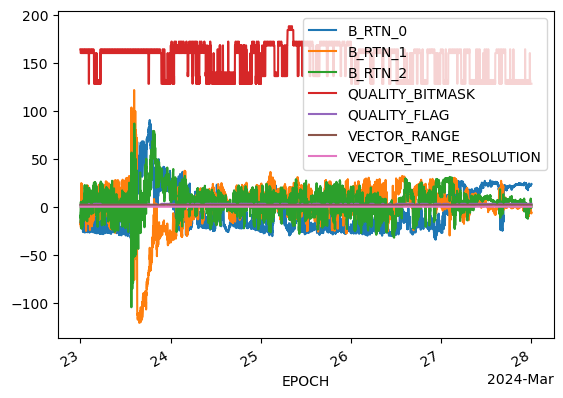

In [ ]:
ts_solo.peek()

In [ ]:
ts_solo_cme = ts_solo.truncate(TimeRange(time_event_start, time_event_start+2*u.day))

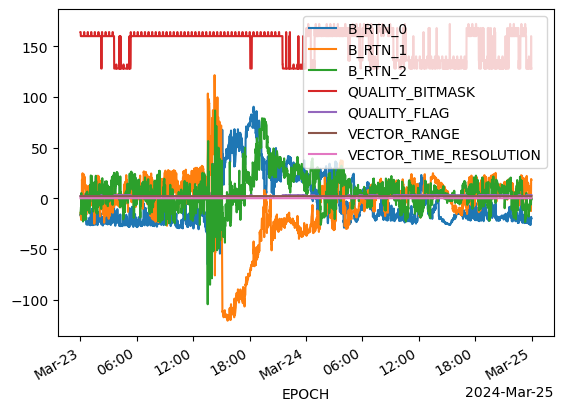

In [ ]:
ts_solo_cme.peek()

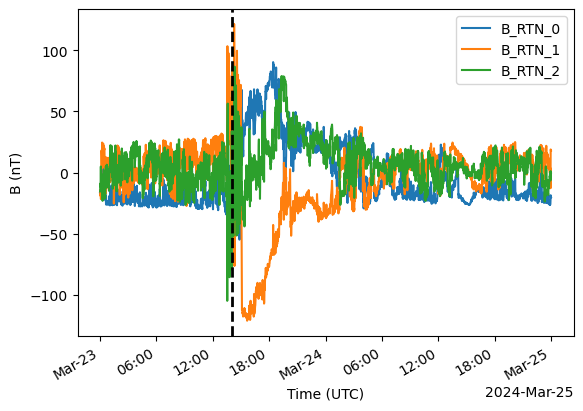

In [ ]:
time_arrival_solo = Time('2024-03-23T14:01Z')

ts_solo_cme.plot(columns=['B_RTN_0', 'B_RTN_1', 'B_RTN_2'])
plt.axvline((time_arrival_solo).datetime, color='k', ls='--', linewidth=2)
plt.xlabel("Time (UTC)")
plt.ylabel("B (nT)")
# plt.title("Solar Orbiter in situ magnetic field data", fontsize=16)
plt.savefig('solo_cme.png', dpi=300)
plt.show()